# Part A

In [1]:
import numpy as np
import os.path as osp
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load MusicRecords data from a CSV file
df = pd.read_csv("/Users/ka/Desktop/MusicData.csv", encoding='ISO-8859-1')

# Display the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7574 non-null   int64  
 1   songtitle                 7574 non-null   object 
 2   artistname                7574 non-null   object 
 3   songID                    7574 non-null   object 
 4   artistID                  7574 non-null   object 
 5   timesignature             7574 non-null   int64  
 6   timesignature_confidence  7574 non-null   float64
 7   loudness                  7574 non-null   float64
 8   tempo                     7574 non-null   float64
 9   tempo_confidence          7574 non-null   float64
 10  key                       7574 non-null   int64  
 11  key_confidence            7574 non-null   float64
 12  energy                    7574 non-null   float64
 13  pitch                     7574 non-null   float64
 14  timbre_0

In [3]:
# How many songs does the dataset include for which the artist name is "Michael Jackson"?
# Counting songs by the artist "Michael Jackson"
mj_count = df[df['artistname'] == "Michael Jackson"].shape[0]

print(mj_count)

18


In [5]:
# Splitting data into training and testing sets
train_df = df[df['year'] <= 2009]
test_df = df[df['year'] == 2010]

# we want to exclude some of the variables in our dataset from being used as independent variables
# ("year", "songtitle", "artistname", "songID", and "artistID").
columns_to_exclude = ["year", "songtitle", "artistname", "songID", "artistID"]

# To remove these variables from training and testing sets:
train_df = train_df.drop(columns=columns_to_exclude)
test_df = test_df.drop(columns=columns_to_exclude)

# Building a logistic regression model to predict Top10 using the training data.
X_train = train_df.drop(columns="Top10")
y_train = train_df["Top10"]

# Adding a constant column for the intercept
X_train_sm = sm.add_constant(X_train)

# Building the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Displaying the summary
result.summary()

Optimization terminated successfully.
         Current function value: 0.330451
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7167
Method:                           MLE   Df Model:                           33
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                  0.2091
Time:                        09:40:38   Log-Likelihood:                -2379.6
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                2.683e-243
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       14.7000      1.806      8.138      0.000      11.160      18.240
timesignature                0.1264      0.087      1.457      0.145      -0.044       0.296
timesignature_confidence     0.7450      0.195      3.814      0.000       0.362       1.128
loudness                     0.2999      0.029     10.282      0.000       0.243       0.357
tempo                        0.0004      0.002      0.215      0.830      -0.003       0.004
tempo_confidence             0.4732      0.142      3.328      0.001       0.195       0.752
key                          0.0159      0.010      1.529      0.126      -0.004       0.036
key_confidence               0.3087      0.141      2.187      0.029       0.032       0.585
energy                      -1.5021      0.310     -4.847      0.000      -2.110      -0.895
pitch                      -44.9077      6.835     -6.570      0.000     -58.304     -31.511
timbre_0_min                 0.0232      0.004      5.441      0.000       0.015       0.032
timbre_0_max                -0.3310      0.026    -12.882      0.000      -0.381      -0.281
timbre_1_min                 0.0059      0.001      7.542      0.000       0.004       0.007
timbre_1_max                -0.0002      0.001     -0.342      0.732      -0.002       0.001
timbre_2_min                -0.0021      0.001     -1.889      0.059      -0.004    7.95e-05
timbre_2_max                 0.0007      0.001      0.726      0.468      -0.001       0.002
timbre_3_min                 0.0007      0.001      1.156      0.248      -0.000       0.002
timbre_3_max                -0.0030      0.001     -5.103      0.000      -0.004      -0.002
timbre_4_min                 0.0104      0.002      5.237      0.000       0.007       0.014
timbre_4_max                 0.0061      0.002      3.942      0.000       0.003       0.009
timbre_5_min                -0.0056      0.001     -4.385      0.000      -0.008      -0.003
timbre_5_max              7.736e-05      0.001      0.097      0.922      -0.001       0.002
timbre_6_min                -0.0169      0.002     -7.445      0.000      -0.021      -0.012
timbre_6_max                 0.0037      0.002      1.675      0.094      -0.001       0.008
timbre_7_min                -0.0045      0.002     -2.554      0.011      -0.008      -0.001
timbre_7_max                -0.0038      0.002     -2.060      0.039      -0.007      -0.000
timbre_8_min                 0.0039      0.003      1.372      0.170      -0.002       0.009
timbre_8_max                 0.0040      0.003      1.336      0.182      -0.002       0.010
timbre_9_min                 0.0014      0.003      0.456      0.648      -0.005       0.007
timbre_9_max                 0.0016      0.002      0.659      0.510      -0.003       0.006
timbre_10_min                0.0041      0.002      2.244      0.025       0.001       0.008
timbre_10_max                0.0058      0.002      3.292      0.001       0.00

# Part B

In [8]:
# Making predictions on the test set
X_test = test_df.drop(columns="Top10")
y_test = test_df["Top10"]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Fit the logistic regression model using scikit-learn
log_reg = LogisticRegression(max_iter=10000000)
log_reg.fit(X_train, y_train)


y_pred_prob = log_reg.predict_proba(X_test)[:, 1]   # Probabilities of being in the "Top10" category

predicted_classes = (y_pred_prob > 0.15).astype(int)  # Convert these probabilities into class predictions (i.e., 1 for "Top10" and 0 otherwise) based on a threshold 0.15.

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Computing the accuracy rate on the test set
test_accuracy = (predicted_classes == y_test).mean()

print(conf_matrix)
print(test_accuracy)


[[234  80]
 [ 14  45]]
0.7479892761394102


# Part C 

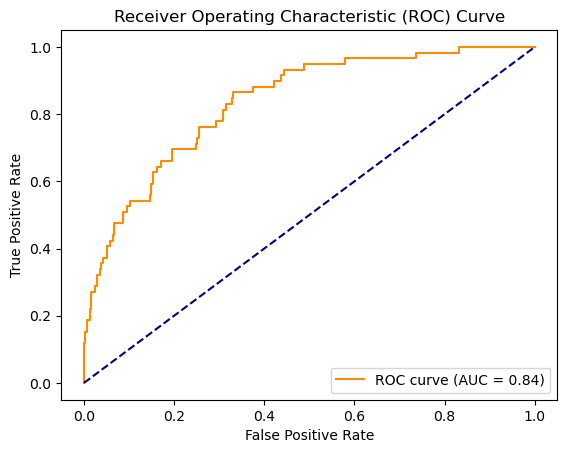

In [10]:
# Generating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Part D


### 0. change model hyperparamter 'class_weighted' to be 'balanced'
Since the given data is unbalanced between the two categories in 'Top10' column, it's crucial for model to learn the distribution bias. One of the option to mitigate this problem is to assign different weights to label classes during training phase by setting the 'class_weighted'='balanced'

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split train set into train&valid set

# Splitting data into training and testing sets
train = df[df['year'] <= 2009]
test = df[df['year'] == 2010]

# we want to exclude some of the variables in our dataset from being used as independent variables
# ("year", "songtitle", "artistname", "songID", and "artistID").
columns_to_exclude = ["year", "songtitle", "songID", "artistID", "artistname"]

# To remove these variables from training and testing sets:
train_df = train.drop(columns=columns_to_exclude)
test_df = test.drop(columns=columns_to_exclude)

# Building a logistic regression model to predict Top10 using the training data.
X_train = train_df.drop(columns="Top10")
y_train = train_df["Top10"]


X_test = test_df.drop(columns="Top10")
y_test = test_df["Top10"]


In [17]:
#default performance
logreg = LogisticRegression(max_iter=1000, solver='liblinear',class_weight='balanced', random_state=42)  # Define logreg here
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

In [19]:
# pred_valid = (y_pred_prob > 0.15).astype(int)
# logreg.score(X_valid, y_valid)
def generate_auc(model, X,y):
    pred = logreg.predict_proba(X)[:, 1]
    label = y
    fpr, tpr, thresholds = roc_curve(label, pred)
    roc_auc = auc(fpr, tpr)
    return roc_auc

generate_auc(logreg, X_test, y_test)

0.8307243873475116

### 1. Normalization on Numeric columns
Using StandardScaler for numerical value

In [22]:
# covert text column into OneHot encoding
from sklearn.preprocessing import OneHotEncoder

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7201 entries, 373 to 7573
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timesignature             7201 non-null   int64  
 1   timesignature_confidence  7201 non-null   float64
 2   loudness                  7201 non-null   float64
 3   tempo                     7201 non-null   float64
 4   tempo_confidence          7201 non-null   float64
 5   key                       7201 non-null   int64  
 6   key_confidence            7201 non-null   float64
 7   energy                    7201 non-null   float64
 8   pitch                     7201 non-null   float64
 9   timbre_0_min              7201 non-null   float64
 10  timbre_0_max              7201 non-null   float64
 11  timbre_1_min              7201 non-null   float64
 12  timbre_1_max              7201 non-null   float64
 13  timbre_2_min              7201 non-null   float64
 14  timbre_2_ma

In [24]:
print(X_train.columns)
# two columns ['timesignature', 'key'] are categorical columns
# the other columns are numerical columns (able to appply normalization)

print(X_train.timesignature.value_counts())
print(X_train.key.value_counts())


Index(['timesignature', 'timesignature_confidence', 'loudness', 'tempo',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max'],
      dtype='object')
timesignature
4    6461
3     471
1     137
5     104
7      18
0      10
Name: count, dtype: int64
key
7     859
9     816
2     792
0     765
1     690
11    621
4     594
6     514
5     484
10    450
8     412
3     204
Name: count, dtype: int64


In [26]:
num_cols = X_train.columns[X_train.dtypes == 'float64']

std_scaler = StandardScaler()
X_train[num_cols] = std_scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = std_scaler.transform(X_test[num_cols])

In [28]:
logreg = LogisticRegression(max_iter=50, solver='liblinear',class_weight='balanced', random_state=42)  # Define logreg here
logreg.fit(X_train, y_train)
print(generate_auc(logreg, X_test, y_test))

0.8372557486775343


#### Selecte Feature

In [31]:
# Standardize features (important for some models like logistic regression)
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
feature_names = X_train.columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate model
def evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_prob)
    return auc_score


In [33]:
# 1. Feature Selection using Recursive Feature Elimination (RFE)
rfe_selector = RFE(logreg, n_features_to_select=20)
X_train_rfe = rfe_selector.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe_selector.transform(X_test_scaled)
rfe_selected_features = feature_names[rfe_selector.get_support()]
rfe_auc = evaluate_model(X_train_rfe, X_test_rfe, y_train, y_test, logreg)

print("\nRFE Selected Features:", rfe_selected_features)
print("AUC with RFE selected features:", rfe_auc)


RFE Selected Features: Index(['timesignature_confidence', 'loudness', 'tempo_confidence', 'energy',
       'pitch', 'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_6_min',
       'timbre_6_max', 'timbre_7_min', 'timbre_7_max', 'timbre_10_min',
       'timbre_10_max', 'timbre_11_min', 'timbre_11_max'],
      dtype='object')
AUC with RFE selected features: 0.8377955306056353


In [35]:

# 2. Feature Selection using Random Forest Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]
rf_selected_features = feature_names[indices]
X_train_rf = X_train_scaled[:, indices]
X_test_rf = X_test_scaled[:, indices]
rf_auc = evaluate_model(X_train_rf, X_test_rf, y_train, y_test, logreg)

print("\nRandom Forest Selected Features:", rf_selected_features)
print("AUC with Random Forest selected features:", rf_auc)


Random Forest Selected Features: Index(['timbre_0_max', 'timbre_6_min', 'timbre_11_min', 'timbre_4_max',
       'timbre_1_min', 'loudness', 'energy', 'timbre_5_min', 'timbre_1_max',
       'tempo_confidence'],
      dtype='object')
AUC with Random Forest selected features: 0.7722120263413581


In [37]:
# 3. Feature Selection using ANOVA F-test
f_selector = SelectKBest(f_classif, k=10)
X_train_f = f_selector.fit_transform(X_train_scaled, y_train)
X_test_f = f_selector.transform(X_test_scaled)
f_selected_features = feature_names[f_selector.get_support()]
f_auc = evaluate_model(X_train_f, X_test_f, y_train, y_test, logreg)

print("\nANOVA F-test Selected Features:", f_selected_features)
print("AUC with ANOVA F-test selected features:", f_auc)


ANOVA F-test Selected Features: Index(['pitch', 'timbre_0_max', 'timbre_2_min', 'timbre_4_max', 'timbre_6_min',
       'timbre_7_min', 'timbre_8_max', 'timbre_9_max', 'timbre_11_min',
       'timbre_11_max'],
      dtype='object')
AUC with ANOVA F-test selected features: 0.7865702256288459


In [39]:
# 4. PAC feature selected
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=0.90)  # Retain 75% of variance

# Convert to a DataFrame
train_pca = pd.DataFrame(data=pca.fit_transform(X_train[num_cols]), columns=[f'PC{i+1}' for i in range(pca.n_components_)])
test_pca = pd.DataFrame(data=pca.transform(X_test[num_cols]), columns=[f'PC{i+1}' for i in range(pca.n_components_)])
train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,-0.011298,-0.158496,-1.621614,0.676973,-1.732851,0.354963,-0.185405,-0.789534,-1.277992,-0.171623,...,-0.884162,-0.660634,0.486375,0.457545,-0.300362,0.142182,-0.671913,-0.079730,0.226177,-1.139679
1,-0.955159,1.121586,-1.678985,-0.807340,-1.210172,0.858146,-0.442839,0.091430,-0.157601,0.722768,...,0.480040,1.118548,1.278232,-0.469118,-0.630469,-0.502384,-0.253779,0.396338,0.626316,0.224622
2,2.216040,-0.042685,-1.094501,-1.880739,0.525694,-0.066337,0.083895,0.692693,-0.395587,-0.564003,...,0.743141,0.655502,0.516516,-0.508442,-1.090538,0.524135,-0.214675,0.329329,0.105218,-0.036420
3,0.936871,0.025275,-1.994301,-0.440738,-1.619375,0.577248,-0.830928,1.053869,-0.519654,-0.486448,...,-1.545384,0.583855,2.324113,0.787635,-0.236019,-0.640008,-0.656963,0.581560,0.513815,-0.169754
4,-0.536701,-0.047017,-0.308289,-1.243631,-2.782496,-1.046346,0.014159,-0.765989,-0.807832,-0.064812,...,0.223293,0.534375,0.221532,0.111811,-0.055901,-0.055839,1.296341,-0.881909,0.026474,-0.556811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,1.602927,0.498602,-2.199212,0.468562,-0.454994,-0.544294,0.614349,-2.061850,-0.354936,0.393848,...,-2.751396,-0.733291,-0.913630,-0.373515,1.814036,-0.098617,-0.241740,-0.385336,-0.304794,-0.302822
7197,-0.110734,0.838236,-1.643999,1.341558,0.173906,0.293183,1.210264,1.359929,-0.913024,-0.107781,...,-0.417618,0.940977,-0.565784,0.092363,0.193377,-0.903686,0.660708,0.462829,-1.031819,-1.103446
7198,0.687608,0.371248,-1.809164,1.537263,-0.519964,-0.681075,1.592987,-0.063751,-1.444126,0.322846,...,0.510366,0.175357,-0.869068,-1.000892,1.702184,-0.116210,-0.359104,-0.479056,-1.431890,-0.297852
7199,1.598381,-1.141004,0.175792,1.169491,0.107456,0.721439,2.043227,-0.542465,0.683619,2.122106,...,-1.089642,0.042234,1.718341,-0.097424,1.468104,0.148485,1.221712,1.104092,0.195327,0.559727


In [41]:
logreg = LogisticRegression(max_iter=100, solver='liblinear',class_weight='balanced', random_state=42)  # Define logreg here
logreg.fit(train_pca, y_train)
print(generate_auc(logreg, test_pca, y_test))

0.8343409262657887


* After doing some feature selcected I found that the AUC even decreased, but in train sets, the ACC is really high, so I draw the matrix to see the correlation of both test and train sets and tried to find why this happened. 

In [44]:
train_df.corr().style.background_gradient(cmap='coolwarm', axis=None)

,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,timbre_0_min,timbre_0_max,timbre_1_min,timbre_1_max,timbre_2_min,timbre_2_max,timbre_3_min,timbre_3_max,timbre_4_min,timbre_4_max,timbre_5_min,timbre_5_max,timbre_6_min,timbre_6_max,timbre_7_min,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
timesignature,1.000000,0.343982,0.105772,0.048711,0.163705,0.017573,-0.015918,0.086373,-0.094442,0.013387,0.100020,-0.016925,0.023043,-0.039716,0.019739,0.006046,-0.022125,-0.004021,0.038112,-0.051730,0.031055,-0.029081,0.055447,-0.048819,0.002040,-0.050335,0.014356,-0.014653,0.035694,-0.008730,0.024450,-0.071138,-0.002587,0.046631
timesignature_confidence,0.343982,1.000000,0.165698,-0.029784,0.328599,0.006794,-0.016430,0.105932,-0.096877,-0.026330,0.167656,-0.024431,0.047573,-0.110770,-0.001811,-0.022643,0.004537,0.020022,0.080582,-0.111816,0.050928,-0.031362,0.076601,-0.073593,0.033254,-0.079158,-0.034307,-0.051114,0.068768,-0.047835,0.024220,-0.073912,-0.031432,0.063024
loudness,0.105772,0.165698,1.000000,0.048535,0.142883,-0.007782,0.019482,0.739907,0.056570,0.009399,0.905896,0.260369,0.048432,0.078648,0.052882,-0.016158,0.207246,-0.003363,-0.093377,-0.059090,0.068170,0.120855,-0.005232,0.095302,-0.008656,0.072235,-0.166992,0.099819,-0.026380,-0.211983,0.092053,-0.037403,-0.173335,-0.086546
tempo,0.048711,-0.029784,0.048535,1.000000,-0.023281,0.018874,0.070996,0.154990,0.038598,0.021309,0.000627,0.079404,-0.043764,0.043398,-0.013690,0.047962,-0.005910,-0.018818,-0.084995,0.008691,-0.009727,0.077725,-0.017609,0.089338,-0.075726,0.071573,-0.018156,0.073398,-0.049463,0.031375,-0.007268,0.003122,-0.012130,-0.003578
tempo_confidence,0.163705,0.328599,0.142883,-0.023281,1.000000,0.013343,-0.013629,0.151836,-0.052323,-0.031846,0.077482,0.049810,0.046261,-0.133531,-0.032755,0.013770,0.032903,0.002233,0.040958,-0.108568,0.086077,-0.017861,0.062043,-0.051643,0.035375,-0.042807,-0.004713,-0.032859,0.080880,-0.043192,0.082236,-0.093265,-0.039039,0.086315
key,0.017573,0.006794,-0.007782,0.018874,0.013343,1.000000,-0.043572,0.006268,0.011460,-0.008790,-0.015478,0.010649,0.008358,-0.034573,0.018202,-0.008043,0.010024,-0.027567,0.005220,-0.023763,0.008153,-0.017555,0.032825,0.003366,0.005511,-0.019667,0.003711,-0.020255,0.008604,0.007024,0.012915,0.007080,0.017008,0.025326
key_confidence,-0.015918,-0.016430,0.019482,0.070996,-0.013629,-0.043572,1.000000,-0.055377,-0.084859,-0.044228,0.060646,-0.075759,-0.044558,0.016704,0.000559,-0.000302,-0.049084,0.024946,0.027472,0.021183,-0.020664,-0.018944,-0.004472,-0.022219,-0.003677,-0.005621,0.003680,-0.018346,-0.024189,0.060494,-0.014574,-0.033262,0.032323,0.010021
energy,0.086373,0.105932,0.739907,0.154990,0.151836,0.006268,-0.055377,1.000000,0.312263,0.090120,0.563235,0.484663,0.002001,0.243010,0.013519,0.153648,0.160217,-0.039110,-0.289538,0.036369,-0.041565,0.294757,-0.098479,0.329769,-0.172629,0.182794,-0.282351,0.317943,-0.152417,-0.108899,0.022486,0.066856,-0.243295,-0.120898
pitch,-0.094442,-0.096877,0.056570,0.038598,-0.052323,0.011460,-0.084859,0.312263,1.000000,0.058182,-0.049322,0.391955,-0.098108,0.350667,-0.068485,0.136167,0.033344,0.108206,-0.302107,0.223960,-0.103596,0.278047,-0.219001,0.336376,-0.184386,0.229391,-0.294400,0.287906,-0.218042,0.018867,-0.087253,0.261539,-0.200903,-0.135724
timbre_0_min,0.013387,-0.026330,0.009399,0.021309,-0.031846,-0.008790,-0.044228,0.090120,0.058182,1.000000,-0.047483,0.107283,-0.085275,0.133879,0.107136,-0.022874,-0.082460,0.020811,-0.044693,0.030194,-0.024819,0.048254,0.006021,0.042752,-0.094521,0.060985,0.001905,0.100703,0.010839,0.041833,-0.044940,0.011006,-0.061334,0.068825


In [51]:
# plot the correlation matrix of test_df
test_df.corr().style.background_gradient(cmap='coolwarm', axis=None)

,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,timbre_0_min,timbre_0_max,timbre_1_min,timbre_1_max,timbre_2_min,timbre_2_max,timbre_3_min,timbre_3_max,timbre_4_min,timbre_4_max,timbre_5_min,timbre_5_max,timbre_6_min,timbre_6_max,timbre_7_min,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
timesignature,1.000000,0.101833,0.138932,0.113663,0.113648,0.031701,-0.011041,0.194283,-0.069367,-0.027836,0.134274,0.037844,0.092438,-0.099008,-0.010580,0.028675,0.005930,-0.162506,-0.047856,-0.053229,0.074213,0.031201,0.008354,0.058545,-0.021773,-0.001776,-0.064993,-0.008684,0.079994,-0.026822,-0.096891,-0.132810,-0.065649,-0.040390
timesignature_confidence,0.101833,1.000000,0.048915,-0.068989,0.228680,0.091807,-0.020177,0.059034,-0.058020,0.021907,0.045147,-0.020288,0.109640,-0.151468,0.070872,-0.048436,0.061641,0.015064,0.002431,-0.074727,0.145972,-0.079154,0.028197,-0.110556,0.140906,-0.078885,-0.073848,-0.078489,0.029705,-0.165107,0.048731,-0.101539,-0.120499,0.016315
loudness,0.138932,0.048915,1.000000,0.106058,0.121711,-0.008654,0.037086,0.789968,0.194162,-0.004406,0.901556,0.348257,0.090464,0.047632,0.018456,-0.100278,0.174982,-0.070986,-0.101241,-0.008737,0.085138,0.123587,0.021053,0.128707,-0.074325,0.026828,-0.123952,0.165665,0.065152,-0.176876,0.086402,-0.050525,-0.163634,-0.129565
tempo,0.113663,-0.068989,0.106058,1.000000,-0.005034,-0.092840,0.084869,0.157333,0.099375,0.009670,0.033477,0.033375,-0.078726,-0.027276,-0.029469,0.025766,0.043166,0.061082,-0.047856,-0.024572,0.037579,0.066572,-0.058633,0.053543,0.001725,0.163668,0.000446,0.075474,0.014254,-0.088467,0.013768,-0.000392,-0.120055,0.013280
tempo_confidence,0.113648,0.228680,0.121711,-0.005034,1.000000,0.084217,-0.008948,0.103494,-0.123497,0.024943,0.080794,0.029395,-0.031180,-0.082300,0.052999,-0.041198,0.043001,-0.011584,0.083965,-0.062409,0.154542,0.053900,0.076393,-0.028978,0.009447,-0.003715,-0.068206,-0.086735,0.095920,-0.034267,0.042595,-0.097525,-0.085816,0.061308
key,0.031701,0.091807,-0.008654,-0.092840,0.084217,1.000000,-0.037188,0.064322,-0.015844,0.023791,-0.017317,-0.011798,-0.022756,0.003595,-0.004996,-0.004238,-0.072896,-0.037795,0.003469,-0.026013,0.015810,-0.003500,0.047717,0.107000,-0.028687,-0.003911,-0.019858,0.037352,-0.035206,0.009734,0.014129,0.019568,-0.010086,0.100461
key_confidence,-0.011041,-0.020177,0.037086,0.084869,-0.008948,-0.037188,1.000000,0.018032,-0.030603,-0.082516,0.067105,-0.079694,0.080457,0.001679,-0.040100,0.031779,0.018796,-0.022015,0.006247,0.023678,0.005121,-0.024254,0.062542,-0.111958,-0.068561,-0.162228,0.017426,-0.087689,-0.042913,-0.035027,-0.042129,0.094718,0.091677,0.015979
energy,0.194283,0.059034,0.789968,0.157333,0.103494,0.064322,0.018032,1.000000,0.365139,0.086209,0.594485,0.481604,0.038139,0.103472,0.001421,0.045808,0.164132,-0.144151,-0.268205,-0.019091,0.016048,0.260738,0.011614,0.305235,-0.192977,0.166294,-0.167316,0.297150,0.028097,-0.127616,0.061249,-0.063811,-0.210048,-0.046090
pitch,-0.069367,-0.058020,0.194162,0.099375,-0.123497,-0.015844,-0.030603,0.365139,1.000000,-0.016899,0.129842,0.232335,-0.119329,0.287710,-0.110384,0.082172,0.089302,0.169268,-0.303244,0.244927,-0.111358,0.263392,-0.244245,0.306821,-0.138931,0.209726,-0.359807,0.264815,-0.155246,0.061072,-0.019353,0.265418,-0.287041,-0.185969
timbre_0_min,-0.027836,0.021907,-0.004406,0.009670,0.024943,0.023791,-0.082516,0.086209,-0.016899,1.000000,-0.099088,0.111105,-0.009989,0.042163,0.113878,-0.102379,-0.045565,-0.033504,-0.010622,-0.070352,0.193015,0.061659,0.144936,-0.019008,-0.194957,0.047208,0.036443,0.010641,0.096498,-0.109557,0.035326,-0.063644,-0.068288,0.351950



After doing the correlation maps, I found that some of the features in train set has very limited influence on the out-put,
but this feature has a significant influence in the test set.

( we can see the last column of this map, and if the color is closer to red, means this feature influnces the result a lot)

In this situation, I decided to add more features.


### 2. Add new columns and use One-hot encoder for categorical columns

Adding two new columns : year and artistname

One-hot encode all the categorical columns ['year', 'artistname', 'timesignature', 'key']


The most promising technique to boost performance is to add additional information.

In [60]:
train = df[df['year'] <= 2009]
test = df[df['year'] == 2010]

# we want to exclude some of the variables in our dataset from being used as independent variables
# ("year", "songtitle", "artistname", "songID", and "artistID").
columns_to_exclude = [ "songtitle", "songID", "artistID"]

# To remove these variables from training and testing sets:
train_df = train.drop(columns=columns_to_exclude)
test_df = test.drop(columns=columns_to_exclude)

# Building a logistic regression model to predict Top10 using the training data.
X_train = train_df.drop(columns="Top10")
y_train = train_df["Top10"]

X_test = test_df.drop(columns="Top10")
y_test = test_df["Top10"]

# normalization on numeric column
std_scaler = StandardScaler()
X_train[num_cols] = std_scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = std_scaler.transform(X_test[num_cols])

cat_cols = X_train.columns[X_train.dtypes != 'float64']
cat_cols

Index(['year', 'artistname', 'timesignature', 'key'], dtype='object')

In [62]:
X_train

,year,artistname,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,...,timbre_7_min,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max
373,2009,Athlete,3,-0.496098,0.583702,-0.715213,0.089299,1,1.234157,-0.306926,...,-0.892129,-0.912037,-0.504611,0.574925,0.329854,1.012795,-0.083656,-0.745845,-0.102915,0.422125
374,2009,Athlete,3,0.215331,-0.148815,0.427406,-0.271519,0,1.047870,-1.270364,...,-0.207986,0.641909,-0.048879,0.551105,-1.018267,0.321195,-0.032112,-0.568048,-1.360511,-0.543173
375,2009,Athlete,4,0.546514,0.919828,0.479240,0.699408,6,-1.202187,0.355315,...,0.528959,-0.191690,0.700340,-0.647258,0.528565,-0.443824,0.295941,-0.863244,-0.284254,-0.084341
376,2009,Athlete,4,-0.128117,0.822038,-1.451895,-0.038628,4,1.263378,0.334345,...,0.536868,-0.081441,0.491250,1.988355,0.464661,0.126098,0.404505,-1.051327,-0.043350,-1.580641
377,2009,Athlete,4,0.530159,0.603488,-1.207634,0.377953,8,0.426913,-0.613707,...,0.192350,0.192717,0.143119,0.015707,-0.205289,1.417379,-0.102706,0.211491,-0.106925,0.041057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7569,1990,Y&T,4,0.599667,-0.298003,-0.571979,0.768292,5,1.657869,1.104496,...,0.816702,-2.130414,-0.184114,0.001663,1.095078,-1.180357,0.903585,-0.261800,-0.264626,1.658998
7570,1990,Y&T,4,0.599667,-0.797188,-1.111522,-1.406454,9,-1.045121,0.569490,...,0.631623,-0.449272,-1.248840,-0.410092,0.457431,0.100352,-0.324228,-0.800294,-0.885275,0.747807
7571,1990,Y&T,4,0.534248,-0.322336,-0.628038,-0.107511,2,-1.308115,0.259924,...,0.521831,0.290877,-2.356482,-0.958914,0.821326,-0.955745,0.988967,0.512935,-0.244060,1.409082
7572,1990,Y&T,4,0.219420,-0.092870,0.149754,0.699408,9,0.678948,1.297329,...,1.611168,0.486492,0.486135,-0.541032,-1.000425,0.022382,0.130521,0.038369,-0.069804,0.949610


In [64]:
# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='infrequent_if_exist')
encoded_features = encoder.fit_transform(X_train[cat_cols])
print(encoded_features.shape)

# Convert encoded features back to a DataFrame
encoded_train = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(cat_cols))

# # Concatenate with the original DataFrame

X_train = pd.concat([X_train.drop(columns=cat_cols, axis=1).reset_index(drop=True), encoded_train.reset_index(drop=True)], axis=1)

(7201, 1029)


In [66]:
# encoded_valid = pd.DataFrame(encoder.transform(X_valid[cat_cols]).toarray(), columns=encoder.get_feature_names_out(cat_cols))
encoded_test = pd.DataFrame(encoder.transform(X_test[cat_cols]).toarray(), columns=encoder.get_feature_names_out(cat_cols))

X_test = pd.concat([X_test.drop(columns=cat_cols).reset_index(drop=True), encoded_test.reset_index(drop=True)], axis=1)

In [68]:
logreg = LogisticRegression(max_iter=50, solver='liblinear',class_weight='balanced', random_state=42)  # Define logreg here
logreg.fit(X_train, y_train)
print(generate_auc(logreg, X_test, y_test))

0.8715319011119508


In [ ]:
# After adding the features we can see that AUC increaed to 0.87, which is good.

In [70]:
X_train

,timesignature_confidence,loudness,tempo,tempo_confidence,key_confidence,energy,pitch,timbre_0_min,timbre_0_max,timbre_1_min,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,-0.496098,0.583702,-0.715213,0.089299,1.234157,-0.306926,-0.496047,-0.480446,0.851011,0.669415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.215331,-0.148815,0.427406,-0.271519,1.047870,-1.270364,-0.351090,-0.392832,0.659145,-1.526237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.546514,0.919828,0.479240,0.699408,-1.202187,0.355315,-0.568525,-0.480446,0.847034,-1.101496,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.128117,0.822038,-1.451895,-0.038628,1.263378,0.334345,0.228739,-0.480446,0.975027,-0.047813,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.530159,0.603488,-1.207634,0.377953,0.426913,-0.613707,-0.206133,-0.480446,0.804287,-0.697112,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,0.599667,-0.298003,-0.571979,0.768292,1.657869,1.104496,0.373696,-0.480446,-0.234820,1.217677,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7197,0.599667,-0.797188,-1.111522,-1.406454,-1.045121,0.569490,0.083782,-0.480446,-0.758723,0.257675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7198,0.534248,-0.322336,-0.628038,-0.107511,-1.308115,0.259924,0.373696,-0.480446,-0.260668,1.395542,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7199,0.219420,-0.092870,0.149754,0.699408,0.678948,1.297329,3.635230,-0.480446,-0.367536,1.323206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [74]:
# This will be my final model

# Part E

In this part we need to analyze what does the coefficients mean, so I plan to find 5 coefficients with the highest absolute value

In [90]:
idx_coef = [(i, coef) for (i, coef) in enumerate(logreg.coef_.tolist()[0])]

# Sort the coefficients by their absolute value in descending order and get the top 10
top_ten_coef = sorted(idx_coef, key=lambda x: abs(x[1]), reverse=True)[:10]

# Print only the top 10 coefficients
print(top_ten_coef)


top_coefficient_indices = [i for i, _ in top_ten_coef]
print(top_coefficient_indices)


[(995, -3.193442709832031), (664, 2.768301040427875), (581, 2.5273423095364933), (504, 2.4532113407891876), (175, 2.423374884559975), (315, -2.3627125121048853), (808, -2.331929913938168), (642, -2.261014539820452), (231, 2.2076624359308705), (958, -2.195398684492076)]
[995, 664, 581, 504, 175, 315, 808, 642, 231, 958]


In [92]:
X_train.iloc[:,top_coefficient_indices]

,artistname_Various artists,artistname_Nickelback,artistname_Madonna,artistname_Kelly Clarkson,artistname_Britney Spears,artistname_Dr. Dooom,artistname_Silkk the Shocker,artistname_Mystic,artistname_Christina Aguilera,artistname_Tori Amos
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# After Print out the highest 10 coulumns, we can find that they are all artistname,
# Lets talk about what does this value mean

In [96]:
X_train[X_train['artistname_Various artists']==1].index

Index([ 404,  405,  406,  407,  408,  409,  410,  411,  412,  413,
       ...
       5958, 5959, 5960, 5961, 5962, 5963, 5964, 5965, 5966, 5967],
      dtype='int64', length=162)

In [98]:
# Print out the songs that with artisname 'Various Artists"
y_train.reset_index(drop=True)[X_train[X_train['artistname_Various artists']==1].index]

404     0
405     0
406     0
407     0
408     0
       ..
5963    0
5964    0
5965    0
5966    0
5967    0
Name: Top10, Length: 162, dtype: int64

In [ ]:
# This feature has a coefficient of -3.19, which is a very high value but nagative.
# After I print out the top10 column of this artist, although he has a lot of songs none of his the song in the top10

In [100]:
X_train[X_train['artistname_Nickelback']==1].index


Index([750, 1228, 1794, 1795, 2677, 3651], dtype='int64')

In [102]:
# Print out the songs that with artisname 'Nickelback'
y_train.reset_index(drop=True)[X_train[X_train['artistname_Nickelback']==1].index]

750     1
1228    1
1794    1
1795    1
2677    1
3651    1
Name: Top10, dtype: int64

In [ ]:
# For this artist, the coefficient of this feature is 2.768301040427875, it is realy high and with a positive value
# He also has a lot of songs in the data sets
# And after I printing out the top10 index, all of his song are in the top10

In [104]:
# Let's see more example
X_train[X_train['artistname_Madonna']==1].index

Index([ 714, 2220, 3586, 3942, 4301, 5043, 5044, 5597, 5828, 6097, 6277, 6536,
       6537, 6790, 6791, 7007, 7008, 7009],
      dtype='int64')

In [106]:
# Print out the songs that with artisname 'Madonna'
y_train.reset_index(drop=True)[X_train[X_train['artistname_Madonna']==1].index]

714     1
2220    1
3586    1
3942    1
4301    1
5043    1
5044    1
5597    1
5828    1
6097    1
6277    1
6536    1
6537    1
6790    1
6791    1
7007    1
7008    1
7009    1
Name: Top10, dtype: int64

In [108]:
X_train[X_train['artistname_Kelly Clarkson']==1].index
# Print out the songs that with artisname 'Kelly Clarkson'
y_train.reset_index(drop=True)[X_train[X_train['artistname_Kelly Clarkson']==1].index]

157     1
1157    1
2147    1
2148    1
2149    1
2150    1
3062    1
3522    1
Name: Top10, dtype: int64

In [ ]:
# These two features also have coefficients with possitve high value, we can see they have a lot of songs
# And after I print out the top10 column, all of their songs are in the list.

In [116]:
# Let's see one more from the dataset.
# Randomly print out a coefficient of the feature around '0'

# Get the coefficients and their corresponding indices
idx_coef = [(i, coef) for (i, coef) in enumerate(logreg.coef_.tolist()[0])]

# Define a threshold for what "around zero" means
threshold = 0.01

# Filter and print out coefficients that are around zero
coefficients_near_zero = [(i, coef) for (i, coef) in idx_coef if abs(coef) < threshold]

# Print the coefficients near zero
print(coefficients_near_zero)

coefficient_indices_0 = [i for i, _ in coefficients_near_zero]
print(coefficient_indices_0)

[(18, -0.006088384981883385), (196, 0.00954555648944803)]
[18, 196]


In [118]:
X_train.iloc[:,coefficient_indices_0]

,timbre_5_max,artistname_Candyman
0,-0.766255,0.0
1,-0.912754,0.0
2,-1.471976,0.0
3,-1.496298,0.0
4,1.836817,0.0
...,...,...
7196,-0.403721,0.0
7197,-0.691814,0.0
7198,0.671703,0.0
7199,-0.588179,0.0


In [120]:
# I am gonna pick Candyman as my feature,
# As the print out, the coefficient of this feature is 0.00954555648944803
# Although it is positive, the value is really low

X_train[X_train['artistname_Candyman']==1].index
y_train.reset_index(drop=True)[X_train[X_train['artistname_Candyman']==1].index]


6897    1
Name: Top10, dtype: int64

In [124]:
# After I print out the Top10 column, I found that this guy only have one song in our data set, and this one is a top10
# We can say that since the limited availability of data, the influnce might not be that big for the result.
# But since it is still positive, this feature will have small a positive influence to let the song be one of the top10.

## Conclusion

#### In logistic regression, the coefficients of each features mean something

#### The logistic regression coefficients give the change in the log odds of the outcome for a one unit increase in the predictor variable. In a simple word, positive coefficient will have a positive influnce and negative coefficient will have a negative influnce.

In [140]:
# My Final model AUC
print(generate_auc(logreg, X_test, y_test))

0.8740148979812156


In [138]:
# My Final model Accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.94
Test Accuracy: 0.84
